# Non-English Speakers in the Chicago area: Most Common Languages are Spanish, Chinese, Polish, and African Languages

By: Elizabeth Koenen

The United States has been an immigrant country since its beginning as a group of colonies on the east coast. These original colonies were majorly English-speaking due to the fact that those colonies were under English rule. However, this does not mean that everyone spoke only English even back then. 
    
Some of the earliest disputes over language policy go back to the days of the colonies. In pennsylvania there were disputes between the German and English speaking settlers over the language that signage would be in. Later language policy became important during the Louisiana Purchase with the acquisition of french-speaking territories. Throughout the history of the United States there have been pushes to make certain languages the official language of the United States. 
    
Although some states have official languages, the United States on a federal level does not. The providing of documents in languages that people can understand is important. In this article we will look at the populations in chicago that speak another language. This article looks to determine the most common languages spoken other than english. 


In [3]:
library(dplyr)
library(ggplot2)
library(zoo)
library(lubridate)
library(scales)
library(reshape2)
library(stringr)
info <- read.csv("Census_Data_-_Languages_spoken_in_Chicago__2008___2012.csv")

In [4]:
info2 <-info %>% mutate(
    Total = AFRICAN.LANGUAGES+ARABIC+ARMENIAN+CAMBODIAN..MON.KHMER.+CHINESE+CREOLE+FRENCH+GERMAN+GREEK+GUJARATI+HEBREW+HINDI+HMONG+HUNGARIAN+ITALIAN+JAPANESE+KOREAN+LAOTIAN+NAVAJO+OTHER.ASIAN+OTHER.INDIC+OTHER.INDO.EURPOEAN+OTHER.NATIVE.NORTH.AMERICAN+OTHER.PACIFIC.ISLAND+OTHER.SLAVIC+OTHER.WEST.GERMANIC+PERSIAN+POLISH+PORTUGUESE+RUSSIAN+SCANDINAVIAN+SERBO.CROATIAN+SPANISH+TAGALOG+THAI+UNSPECIFIED+URDU+VIETNAMESE+YIDDISH,
    Percent_Spanish = SPANISH/Total,
    Percent_Chinese = CHINESE/Total,
    Percent_Polish = POLISH/Total,
    Percent_African = AFRICAN.LANGUAGES/Total,
    Language = str_sub(PREDOMINANT.NONENGLISH.LANGUAGE, start= 0, end = 7)
)%>% group_by(Community.Area)


In [6]:
head(info2)

Community.Area,Community.Area.Name,PREDOMINANT.NONENGLISH.LANGUAGE,AFRICAN.LANGUAGES,ARABIC,ARMENIAN,CAMBODIAN..MON.KHMER.,CHINESE,CREOLE,FRENCH,⋯,UNSPECIFIED,URDU,VIETNAMESE,YIDDISH,Total,Percent_Spanish,Percent_Chinese,Percent_Polish,Percent_African,Language
1,Rogers Park,SPANISH (9.9%),332,165,65,19,215,271,94,⋯,14,85,0,5,8568,0.6188142,0.02509337,0.020191410,0.03874883,SPANISH
2,West Ridge,SPANISH (8.7%),374,1500,2,0,939,110,115,⋯,846,1539,1028,121,19085,0.3085669,0.04920094,0.012837307,0.01959654,SPANISH
3,Uptown,SPANISH (4.9%),750,58,0,13,462,0,79,⋯,0,287,548,0,7154,0.3611965,0.06457926,0.012859938,0.10483646,SPANISH
4,Lincoln Square,SPANISH (8.4%),127,106,31,0,117,12,40,⋯,267,152,131,0,6087,0.4918679,0.01922129,0.006242813,0.02086414,SPANISH
5,North Center,SPANISH (4.2%),0,0,0,0,37,0,20,⋯,9,0,10,0,1899,0.6635071,0.01948394,0.024749868,0.00000000,SPANISH
6,Lake View,SPANISH (1.9%),425,128,0,0,281,0,103,⋯,4,9,166,0,4567,0.3888767,0.06152836,0.034814977,0.09305890,SPANISH


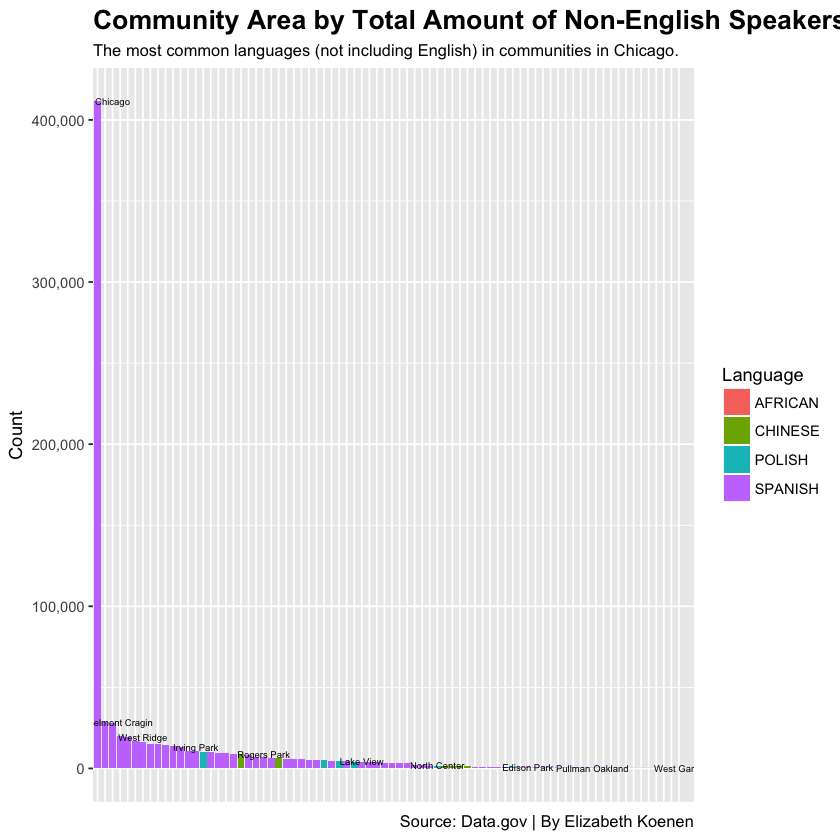

In [19]:
ggplot(info2, aes(reorder(Community.Area.Name, -Total), weight=Total, fill=Language)) + 
geom_bar() +
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
labs(x="Total People Not Speaking English in Community Area", y="Count", title="Community Area by Total Amount of Non-English Speakers", subtitle ="The most common languages (not including English) in communities in Chicago.", caption="Source: Data.gov | By Elizabeth Koenen")+
theme(plot.title = element_text(size = 16, face = "bold")) +
scale_y_continuous(name="Count", labels = comma) +
geom_text(data=info2, 
    aes(Community.Area.Name, Total, label=Community.Area.Name), size=2, nudge_x=2, check_overlap = TRUE)

This graph demonstrates what the most prominent non-english language is broken up by each "Community Area". As one can see the most prominent language is Spanish. The other most common languages were Polish, Chinese, and African Languages. These three seem to be much less prominent. However, these being the most prominent languages spoken in certain communities would indicate that there is a need for information to be included in that language in those areas.

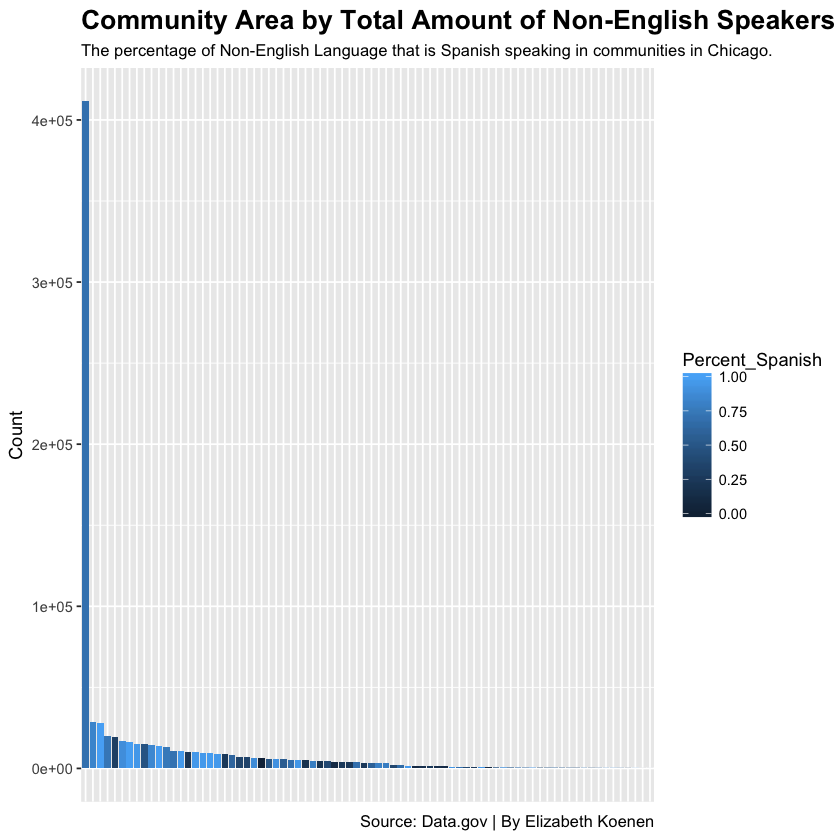

In [118]:
ggplot(info2, aes(reorder(Community.Area.Name, -Total), weight=Total, fill=Percent_Spanish)) + 
geom_bar()+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
labs(x="Total People Not Speaking English in Community Area", y="Count", title="Community Area by Total Amount of Non-English Speakers", subtitle ="The percentage of Non-English Language that is Spanish speaking in communities in Chicago.", caption="Source: Data.gov | By Elizabeth Koenen")+
theme(plot.title = element_text(size = 16, face = "bold"))

This graph is colored by the percentage of Spanish spoken, but shows how large the total population that does speaks a non-english language is. As one can see there is one very large community where many people speak a non-english language. 

This graph shows that many of the larger non-english speaking areas are higher in the percentage of people that are speaking Spanish in those communities.

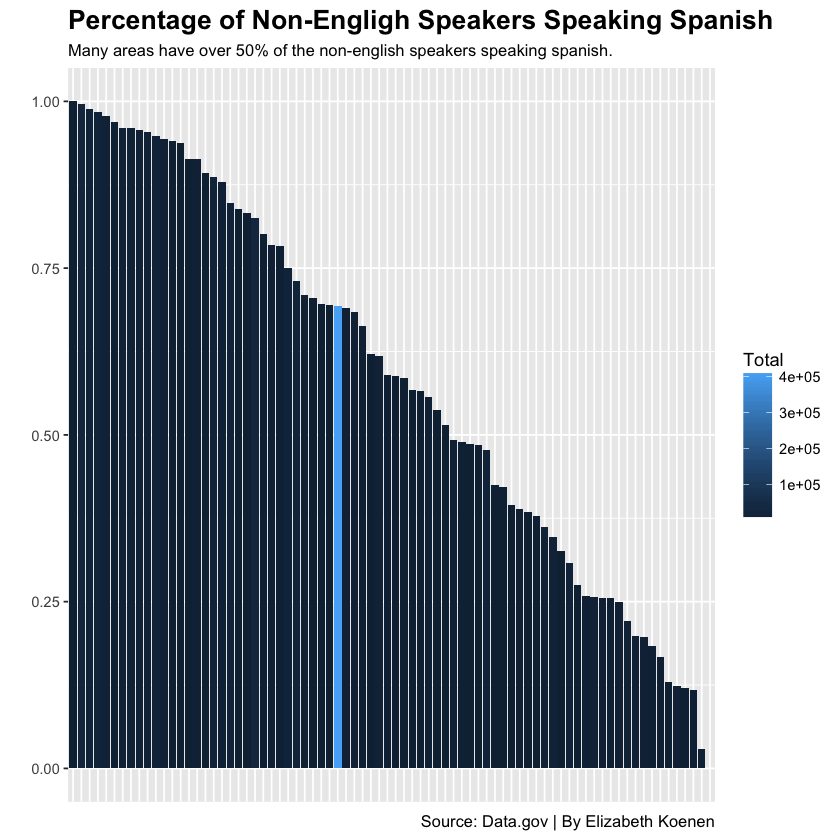

In [139]:
ggplot(info2, aes(reorder(Community.Area.Name, -Percent_Spanish), weight=Percent_Spanish, fill=Total)) + 
geom_bar()+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
labs( y="",title="Percentage of Non-Engligh Speakers Speaking Spanish", subtitle ="Many areas have over 50% of the non-english speakers speaking spanish.", caption="Source: Data.gov | By Elizabeth Koenen")+
theme(plot.title = element_text(size = 16, face = "bold"))

We can see by this graph that many of the communities are small, but that many of them have a large percentage of the non-english speakers speaking Spanish. It can even be seen that that largest non-english speaking community has over 60% of the people speaking Spanish who are not speaking English. Once again this would indicate a great need for information to be given in Spanish.

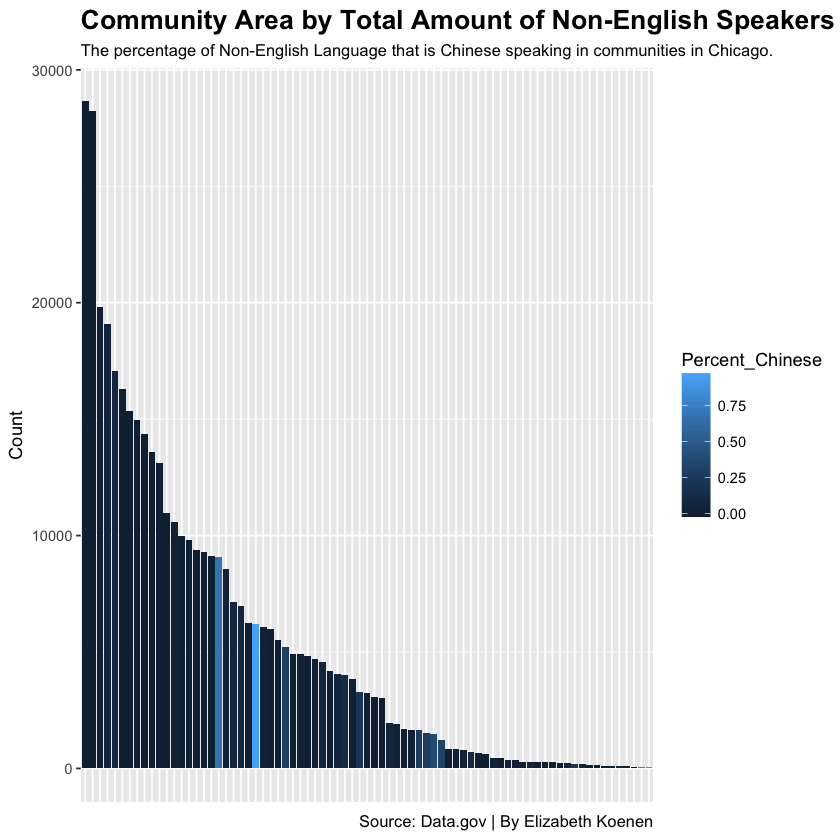

In [21]:
notchicago <- info2 %>% filter(Community.Area.Name != "Chicago")

ggplot(notchicago, aes(reorder(Community.Area.Name, -Total), weight=Total, fill=Percent_Chinese)) + 
geom_bar()+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
labs(x="Total People Not Speaking English in Community Area", y="Count", title="Community Area by Total Amount of Non-English Speakers", subtitle ="The percentage of Non-English Language that is Chinese speaking in communities in Chicago.", caption="Source: Data.gov | By Elizabeth Koenen")+
theme(plot.title = element_text(size = 16, face = "bold"))

This shows that not many of the large non-english speaking communities are speaking Chinese in a great percentage of the population. However, one can see two occurrences of high percentage Chinese speaking communities. It is to be noted that "Chinese" can incompas multiple languages such as Cantonese or Mandarin. This would make it hard to determine what language information should be written in to be most useful.

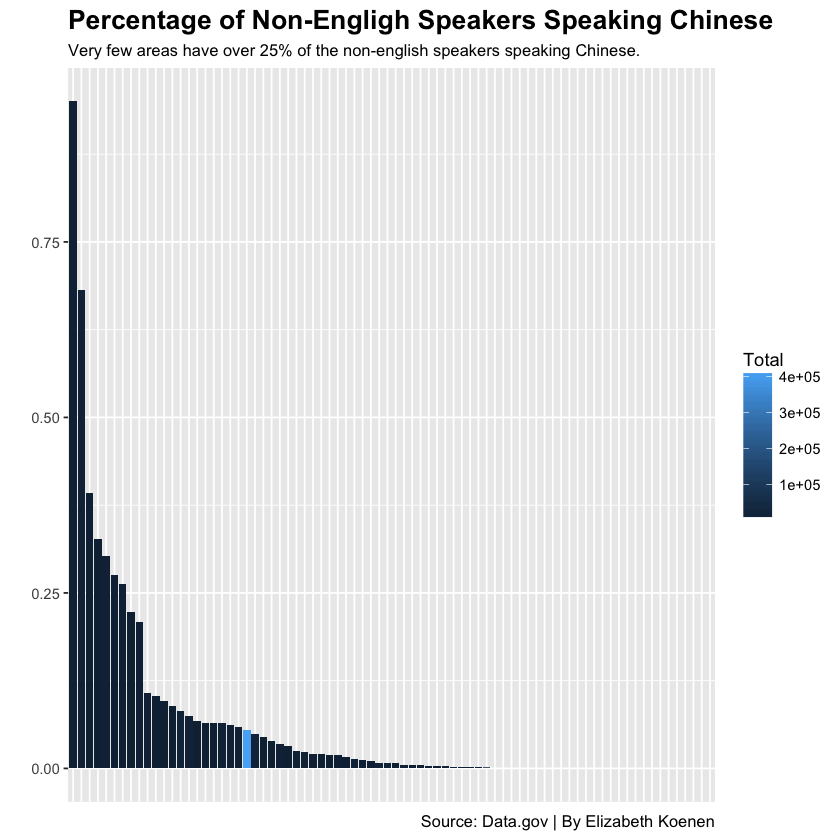

In [137]:
ggplot(info2, aes(reorder(Community.Area.Name, -Percent_Chinese), weight=Percent_Chinese, fill=Total)) + 
geom_bar()+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),)+
labs(y="",title="Percentage of Non-Engligh Speakers Speaking Chinese", subtitle ="Very few areas have over 25% of the non-english speakers speaking Chinese.", caption="Source: Data.gov | By Elizabeth Koenen")+
theme(plot.title = element_text(size = 16, face = "bold"))

The graph shows that the Chinese speaking population is not a abundant as the Spanish speaking population. Chinese speakers account for less than 20% of the non-english speakers in most communities. However, it can been seen that in two communities the Chinese speakers account for over 50% of the non-english speakers. 

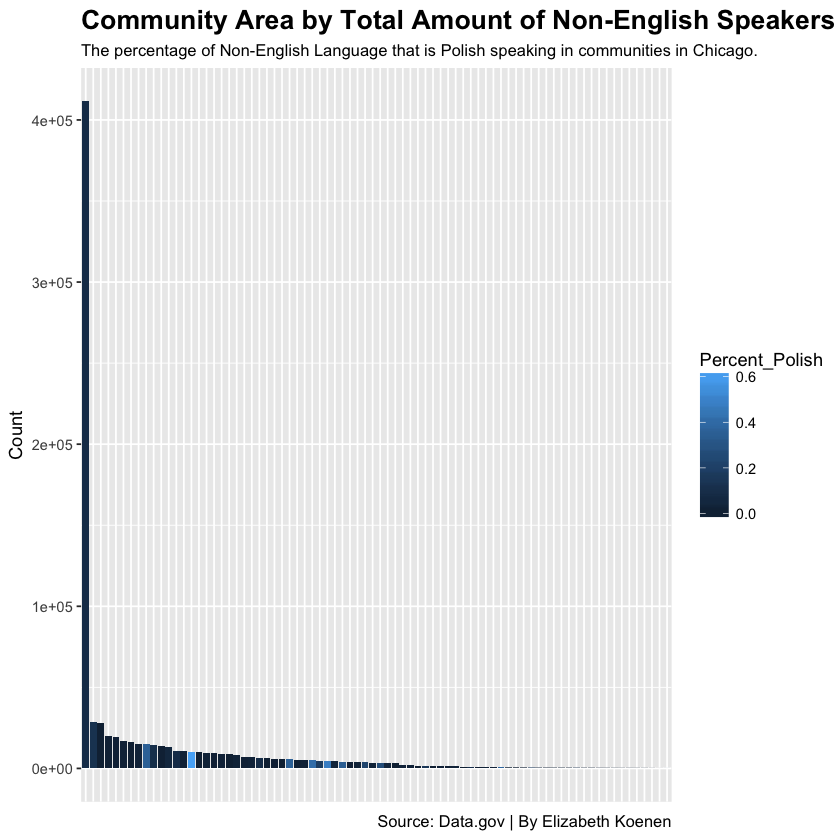

In [122]:
ggplot(info2, aes(reorder(Community.Area.Name, -Total), weight=Total, fill=Percent_Polish)) + 
geom_bar()+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
labs(x="Total People Not Speaking English in Community Area", y="Count", title="Community Area by Total Amount of Non-English Speakers", subtitle ="The percentage of Non-English Language that is Polish speaking in communities in Chicago.", caption="Source: Data.gov | By Elizabeth Koenen")+
theme(plot.title = element_text(size = 16, face = "bold"))

Polish does not seem to be very prevelant in the communities that have large populations of non-english speakers. However, it can been seen in some of the mid-ranging communities. Chicago has a strong history of Polish immigrints. It is interesting to see this to still hold over into today where the language is one of the most prominent non-english languages spoken, even though there is not the same influx of immigrints as in the 20th century.

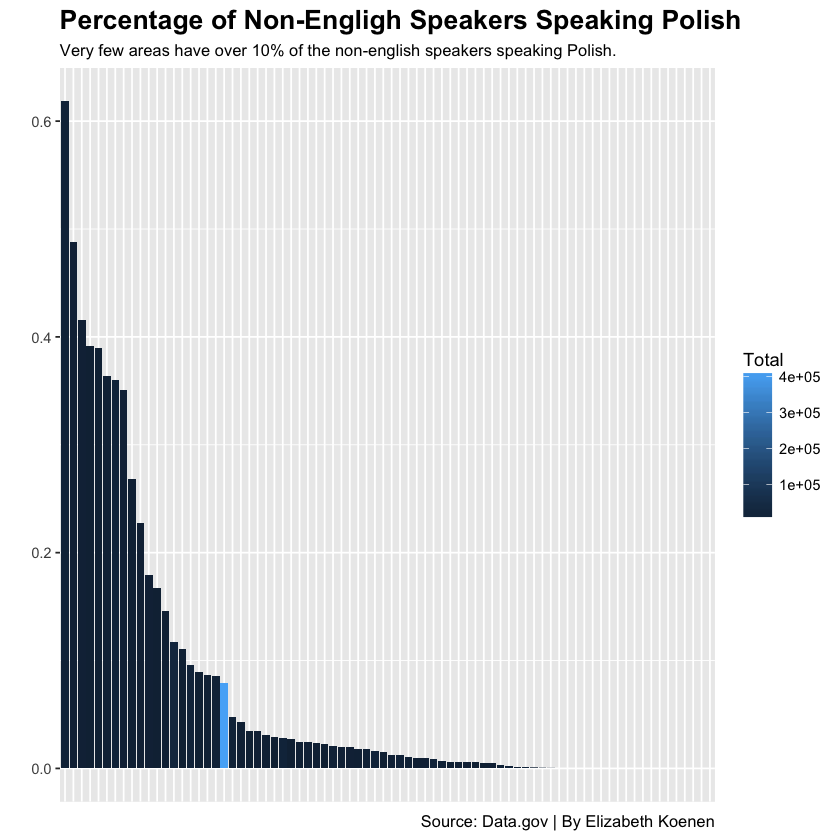

In [138]:
ggplot(info2, aes(reorder(Community.Area.Name, -Percent_Polish), weight=Percent_Polish, fill=Total)) + 
geom_bar()+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
labs( y="",title="Percentage of Non-Engligh Speakers Speaking Polish", subtitle ="Very few areas have over 10% of the non-english speakers speaking Polish.", caption="Source: Data.gov | By Elizabeth Koenen")+
theme(plot.title = element_text(size = 16, face = "bold"))

The graph shows that in multiple "Community Areas" above 20% of the non-english speaking population speaks Polish. It can also be seen that in the largest non-english speaking "Community Area" Polish accounts for under 10%. This can show where information in Polish should be distributed. 

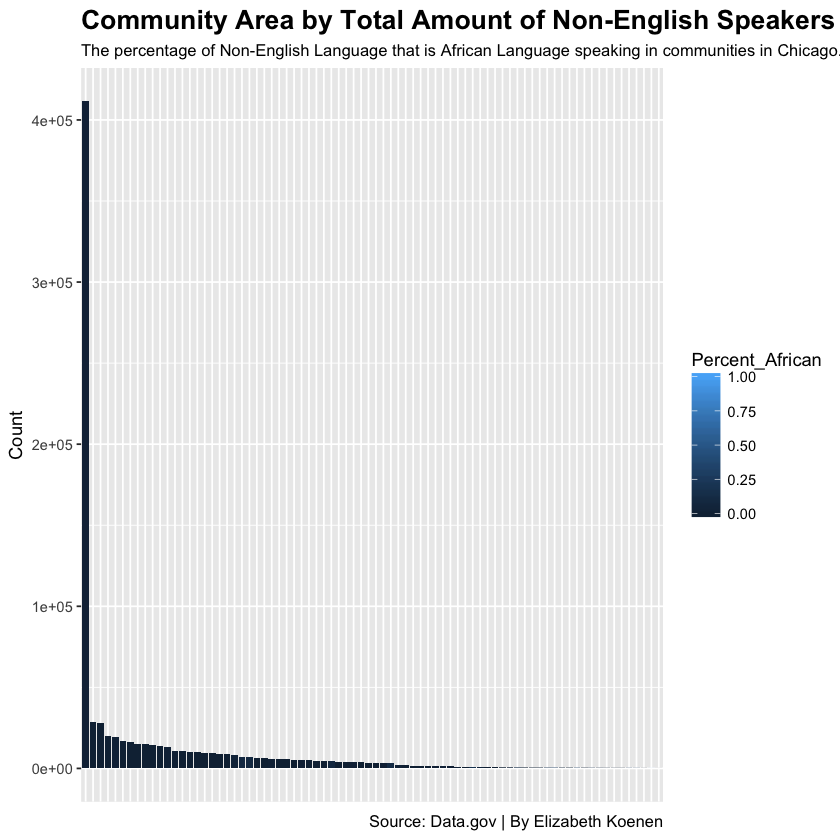

In [147]:
ggplot(info2, aes(reorder(Community.Area.Name, -Total), weight=Total, fill=Percent_African)) + 
geom_bar()+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
labs(x="Total People Not Speaking English in Community Area", y="Count", title="Community Area by Total Amount of Non-English Speakers", subtitle ="The percentage of Non-English Language that is African Language speaking in communities in Chicago.", caption="Source: Data.gov | By Elizabeth Koenen")+
theme(plot.title = element_text(size = 16, face = "bold"))

This graph shows that there is not a great percentage overall of non-english speakers speaking an African Language in great number. It should also be noted the "African Language" is a very broad term and it would be difficult to determine what African languages would be needed in order to best serve those living in the area.

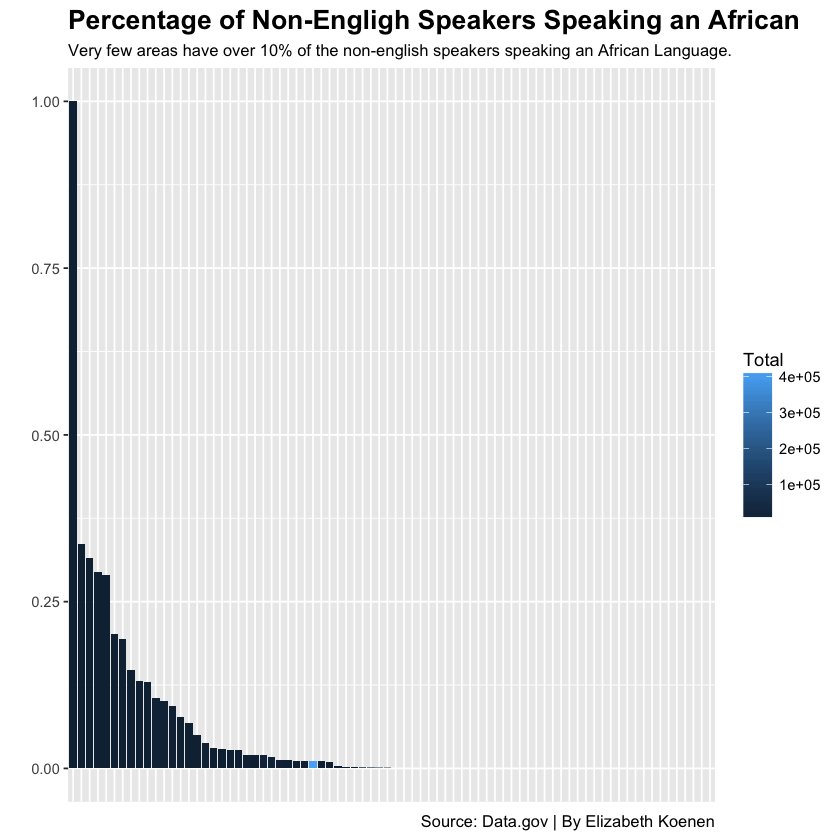

In [146]:
ggplot(info2, aes(reorder(Community.Area.Name, -Percent_African), weight=Percent_African, fill=Total)) + 
geom_bar()+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
labs( y="",title="Percentage of Non-Engligh Speakers Speaking an African", subtitle ="Very few areas have over 10% of the non-english speakers speaking an African Language.", caption="Source: Data.gov | By Elizabeth Koenen")+
theme(plot.title = element_text(size = 16, face = "bold"))

The graph shows that there is one community where 100% of the non-english speaking community speaks an African Language. The graph also shows that in most communities the African Language speaking population is below 25% of the non-english speaking population.

Overall, there can be seen in the modern day city of Chicago the need for diversity in the languages that are used to communicate with the populus. 